### Simple Analysis 

This program will show compute portfolio simple returns, get daily returns and volatility. 

In [16]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 6.7 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.7/104.7 kB 841.3 kB/s eta 0:00:0000:01
  Created wheel for peewee: filename=peewee-3.17.8-cp311-cp311-linux_x86_64.whl size=300748 sha256=8957e006a00558a9f01b53d3efe7f944c998c8852b37acb790fe4ed7e59fe3ce
  Stored in directory: /home/jovyan/.cache/pip/wheels/ff/6c/15/506e25bc390de450a7fa53c155cd9b0fbd13ad3e84a9abc183
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [17]:
#import 

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

plt. style.use('fivethirtyeight')

In [6]:
#Stock symbols 
stockSymbols  = ["GOOGL", "AAPL", "AMZN", "META", "MSFT", "NVDA", "TSLA"]

In [8]:
#start date
stockStartDate = '2022-01-01'

In [9]:
#todays date YYYY-mm-dd
today = datetime.today().strftime('%Y-%m-%d')
print(today)

2024-12-30


In [12]:
#Get the number of assets

numAssets = len(stockSymbols)

#print(f'You have {numAssets} assets in your portfolio.')

In [73]:
#Get stock prices
def getStockPrices(stocks = stockSymbols, start = stockStartDate, end = today, col = 'Close'):
    data = yf.download(stocks, start=start, end=end)[col]
    return data

stocks_prices = getStockPrices(stockSymbols)

#stocks_prices

[*********************100%***********************]  7 of 7 completed


In [32]:
def graph(stocks = stockSymbols, start = stockStartDate, end = today, col = 'Close'):
    #title
    title = f'Portfolio {col} Price {start} to {end}'
    
    #get the stocks
    stocks_prices = getStockPrices(stocks= stocks, start = start, end = end, col = col)
    
    #figure size
    plt.figure(figsize = (12, 8))
    
    #Plot iteration 
    for i in stocks_prices.columns.values:
        plt.plot(stocks_prices[i], label=i)
        
    plt.title(title)
    plt.xlabel(f'Date ({start} - {end})', fontsize = 12)
    plt.ylabel(f'{col} Prices ($USD)', fontsize = 12)
    
    plt.legend(stocks_prices.columns.values, loc = 'upper left')
    plt.show()
    

[*********************100%***********************]  7 of 7 completed


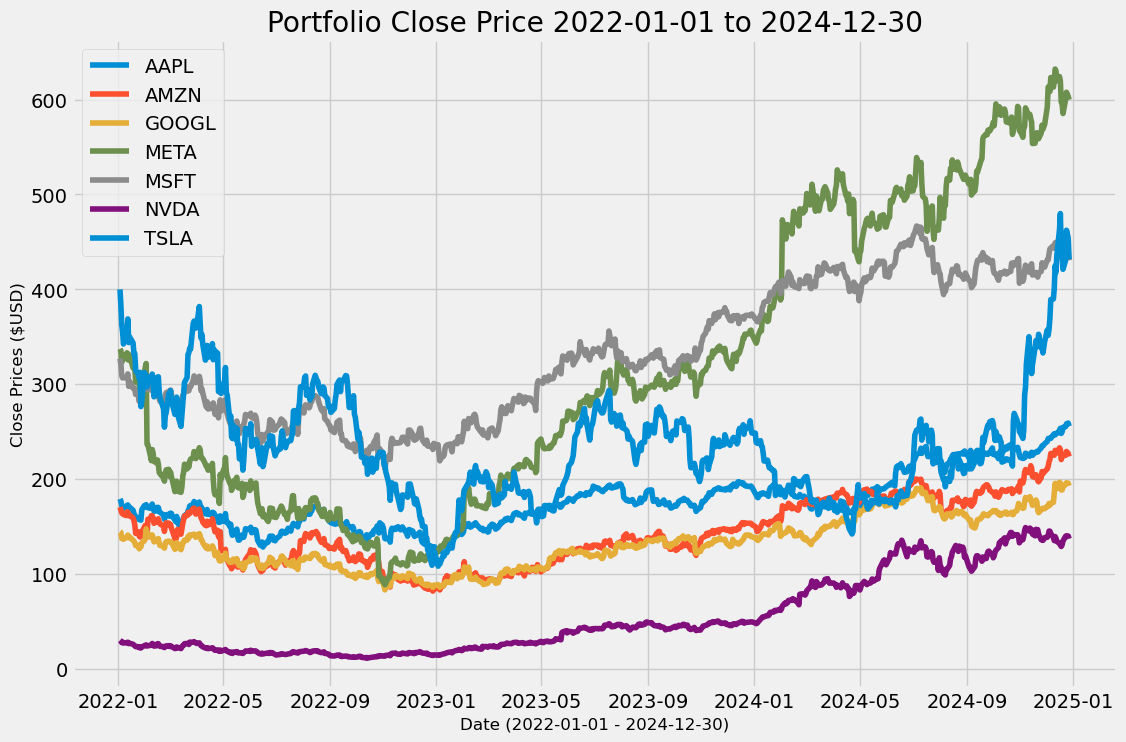

In [33]:
graph(stockSymbols)

In [74]:
# 2 years returns for Big Tech
daily_returns = stocks_prices.pct_change(1) #fractional changes between current and prior element

#daily_returns

In [36]:
daily_returns.corr()

Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
Ticker,,,,,,,
AAPL,1.000000,0.563115,0.622199,0.502307,0.684440,0.554810,0.498880
AMZN,0.563115,1.000000,0.649585,0.598642,0.689201,0.556612,0.448672
GOOGL,0.622199,0.649585,1.000000,0.597194,0.694386,0.548561,0.402920
META,0.502307,0.598642,0.597194,1.000000,0.593425,0.502581,0.316783
MSFT,0.684440,0.689201,0.694386,0.593425,1.000000,0.638074,0.418782
NVDA,0.554810,0.556612,0.548561,0.502581,0.638074,1.000000,0.458779
TSLA,0.498880,0.448672,0.402920,0.316783,0.418782,0.458779,1.000000


In [40]:
daily_returns.cov()
#daily_returns.var()

Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
Ticker,,,,,,,
AAPL,0.000292,0.000233,0.000219,0.000264,0.000203,0.000330,0.000329
AMZN,0.000233,0.000584,0.000324,0.000445,0.000290,0.000469,0.000419
GOOGL,0.000219,0.000324,0.000426,0.000379,0.000249,0.000395,0.000321
META,0.000264,0.000445,0.000379,0.000944,0.000317,0.000538,0.000376
MSFT,0.000203,0.000290,0.000249,0.000317,0.000302,0.000387,0.000281
NVDA,0.000330,0.000469,0.000395,0.000538,0.000387,0.001215,0.000618
TSLA,0.000329,0.000419,0.000321,0.000376,0.000281,0.000618,0.001492


### Results from covariance matrix

Diagonals shows the variance of each stocks symbols and higher the variance the higher risk, higher returns and higher volatility. In constrast, lower variance, lower risk and returns.

Non-diagonals shows covariance between two different stock symbols. If it's positive covariance, it shows that the two assets tend to move in the same direction. Since we are investigating the Big Tech companies, they obviously have some covariance between them. 


### Volatility

In [49]:
daily_returns.std()

Ticker
AAPL     0.017080
AMZN     0.024173
GOOGL    0.020648
META     0.030725
MSFT     0.017386
NVDA     0.034851
TSLA     0.038630
dtype: float64

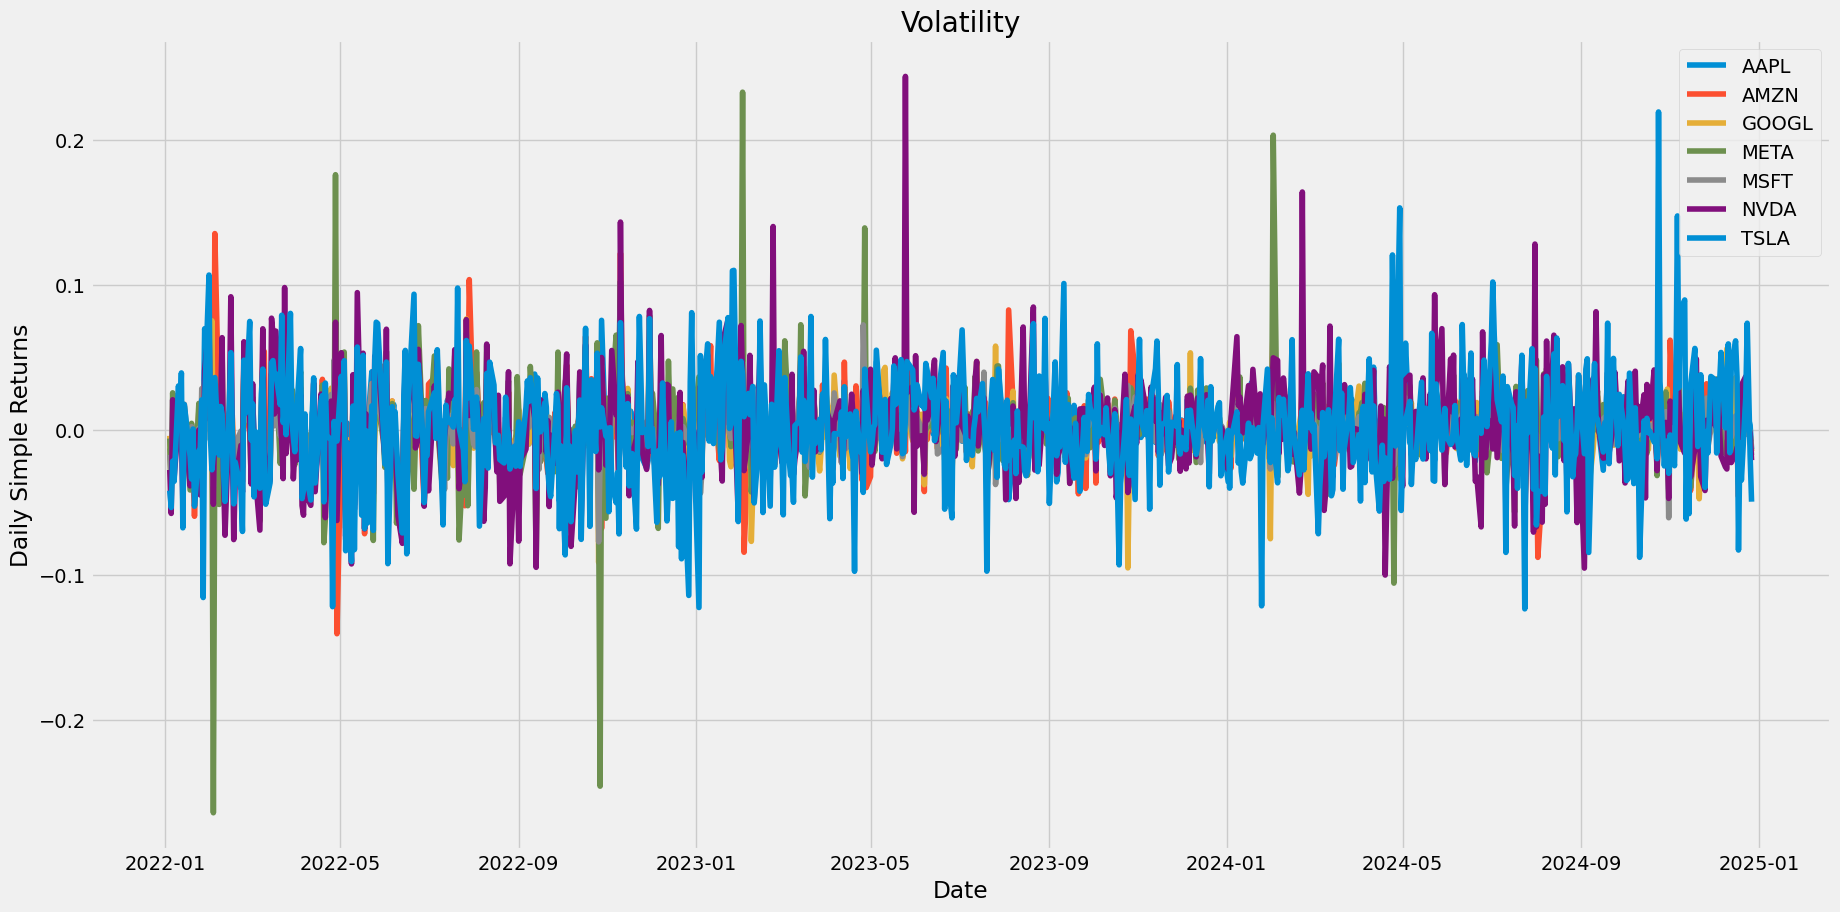

In [53]:
plt.figure(figsize = (20,10))

for i in daily_returns.columns.values:
    plt.plot(daily_returns[i], label = i)
    
plt.legend(loc='upper right')
plt.title('Volatility')
plt.xlabel('Date')
plt.ylabel('Daily Simple Returns')
plt.show()

In [77]:
dailyMean = daily_returns.mean()
#dailyMean

In [61]:
#expected daily return

#5% AAPL, 5% AMZN, 5% GOOGL, 20% META, 15% MSFT, 25% NVDA, 25% TSLA  
randomWeights = np.array([0.05, 0.05, 0.05, 0.2, 0.15, 0.25, 0.25])

portfolioReturn = np.sum(dailyMean * randomWeights)

print(f"The daily expected portfolio return: {portfolioReturn}")

The daily expected portfolio return: 0.001287295662819741


In [64]:
#yearly return

print(f"Expected annualised portfolio return: {portfolioReturn * 251}")

Expected annualised portfolio return: 0.323111211367755


About 32.3% return with the weights of 

5% AAPL, 5% AMZN, 5% GOOGL, 20% META, 15% MSFT, 25% NVDA, 25% TSLA 

In [75]:
#Growth of the investment 

growthReturns = (daily_returns+1).cumprod() #Return cumulative product

#growthReturns

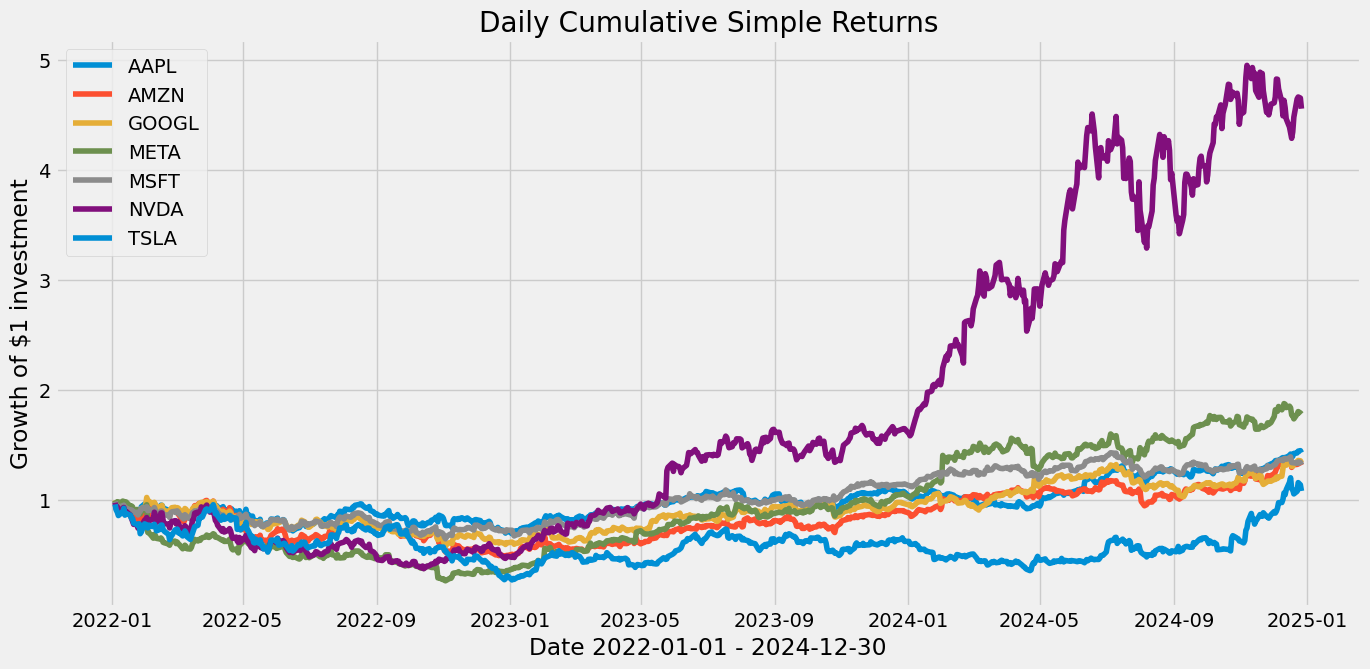

In [72]:
#Visualize daily cumulative returns

plt.figure(figsize = (15,7))

for i in growthReturns.columns.values:
    plt.plot(growthReturns.index, growthReturns[i], label = i)
    
plt.legend(loc = 'upper left')
plt.xlabel(f'Date {stockStartDate} - {today}')
plt.ylabel(f'Growth of $1 investment')
plt.title("Daily Cumulative Simple Returns")
plt.show()